# Prestige Reinforcement Dynamics

This notebook provides a simple version of an asynchronous model of prestige-reinforcement in networked endorsement dynamics, as exemplified by the faculty hiring process. 

This notebook is intentionally designed to expose all calculations, so all functions etc. (other than SpringRank) are defined in here directly. 

In [1]:
import numpy as np
from numba import jit

from py.model import *
from py.scores import *

# from SpringRank import SpringRank

from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial Unicode MS"

In [2]:
# Params

n = 5
n_rounds = 5000
m_updates = 1
A = np.sqrt(np.random.rand(n,n))
A0 = A/A.sum()
lam = .995

In [44]:
scores = {
    'SpringRank': lambda A: homebrew_SpringRank_score(A.T),
    'Root-Degree' : lambda A: powered_degree_score(A, 1/2), 
    'PageRank': PageRank_score,
    'Fiedler Vector' : lambda A: fiedler_vector_score(A)
}

# features

linear_feature = lambda s: np.tile(s,(len(s), 1))

# Detailed Transition in SpringRank Case

In [36]:
n = 10

A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

lam = .9
n_rounds = 5000

b_grid = 101
BETAS = np.linspace(1,6, b_grid)

V = np.zeros((b_grid, n))

M = model()
M.set_score(score_function = lambda A: homebrew_SpringRank_score(A.T))
M.set_features([linear_feature])

for j in range(b_grid):

    M.simulate(beta = np.array([BETAS[j]]), 
                       lam = lam, 
                       A0 = A0, 
                       n_rounds = n_rounds, 
                       update = deterministic_update, 
                       m_updates = m_updates)
    GAMMA = M.get_rates()
    GAMMA = np.sort(GAMMA, axis = 2)
    V[j] = GAMMA[(-1000):(-1)].mean(axis = (0,1))

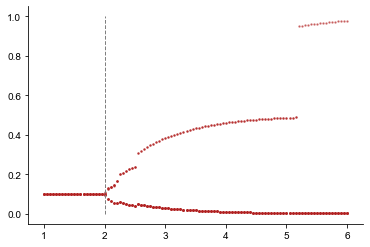

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(V.shape[1]):
    p = ax.scatter(BETAS, V[:,i], color = 'firebrick', alpha = 0.5, s=2)

ax.vlines(x = 2, ymin = 0, ymax = 1, linestyle = 'dashed', linewidth = 1, color = 'grey')    

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('fig/SR_bifurcation_detail.png', bbox_inches = 'tight')

# Other Bifurcations

In [39]:
transition_predictions = {
    'SpringRank': 2, 
    'Root-Degree': 2*n**(1/2),
    'Fiedler Vector': 0
}

In [ ]:
b_grid = 201

n_rounds = 10000

n = 10
A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

BETAS = {
    'SpringRank' : np.linspace(0, 10, b_grid), 
    'Root-Degree': np.linspace(0,10, b_grid),
    'Fiedler Vector' : np.linspace(0,10,b_grid),
}

lam = .9

score_names = ['SpringRank','Root-Degree', 'Fiedler Vector']

k = len(score_names)

fig, axarr = plt.subplots(1,k, figsize = (15, 3.5), sharey = True)

for i in range(k):
    
    M = model()
    M.set_score(score_function = scores[score_names[i]])
    M.set_features([linear_feature])
    
    V = np.zeros((b_grid, n))
    
    for j in range(b_grid):
        M.simulate(beta = np.array([BETAS[score_names[i]][j]]), 
                   lam = lam, 
                   A0 = A0, 
                   n_rounds = n_rounds, 
                   update = deterministic_update, 
                   m_updates = m_updates)
        GAMMA = M.get_rates()
        GAMMA = np.sort(GAMMA, axis = 2)
        V[j] = GAMMA[-1].mean(axis = 0)
    
    if k == 1:
        ax = axarr
    else:
        ax = axarr[i]
    
    for j in range(V.shape[1]):
        p = ax.scatter(BETAS[score_names[i]], V[:,j], color = 'firebrick', alpha = 0.5, s=1.5)

#     p = ax.plot(BETAS[score_names[i]], V, color = 'grey', alpha = .5)
    
    v = ax.vlines(x = [transition_predictions[score_names[i]]], 
                        ymin = 0, 
                        ymax = 1, 
                        linewidth = 0.5, 
                        linestyle = 'dashed')
    
    t = ax.set_title(score_names[i])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set(xlabel = r'$\beta$')
    
    if i == 0:
        ax.set(ylabel = r'$\gamma$')
    
plt.savefig('fig/phase_transitions.png')

In [55]:
axarr[1].vlines(x = (n)**(1/2)/(1/2), ymin = 0, ymax = 1, )

6.324555320336759

In [ ]:
n = 10

lam = .99
A0 = np.random.rand(n,n)
A0 = A0/A0.sum()

M = model()
M.set_score(score_function = lambda A: katz_score(A, alpha = .5))
M.set_features([linear_feature])
n_rounds = 2000

M.simulate(beta = np.array([17]), 
                   lam = lam, 
                   A0 = A0, 
                   n_rounds = n_rounds, 
                   update = deterministic_update, 
                   m_updates = m_updates)
GAMMA = M.get_rates()
# GAMMA = np.sort(GAMMA, axis = 2)

p = plt.plot(GAMMA.mean(axis = 1), color = 'grey', alpha = .5)